In [ ]:
# data exploration
# data cleaning - power query (ETL)
# data wrangling - pivot table
# data analysis
# data visualization

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Automobile_data.csv')

db = pd.read_csv(r"C:\Users\moe_shittu\Desktop\Python Data Analysis\Automobile_data.csv")

db = pd.read_csv(r'C:\Users\moe_shittu\Desktop\Python Data Analysis\Automobile_data.csv')

# Groupby

In [ ]:
# groupby must be done on column that contains duplicates
# a groupby is best done on a column that contains categorical data (text)
# after every groupby, comes statistics (sum, count, max, min, mean)
# every groupby is plottable

In [9]:
df.groupby('company').sum()
df.groupby('company').count().head(2)

# df.groupby('company').agg(['sum','count'])  Ctrl /

,index,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,,,,,,,,,
alfa-romero,3,3,3,3,3,3,3,3,3
audi,4,4,4,4,4,4,4,4,4


### find the average price of all auto's in the data

In [14]:
df['company'].unique()

print(df.query('company=="volvo"')['price'].mean(),'is for volvo')
print(df.query('company=="toyota"')['price'].mean(),'is for toyota')

13177.5 is for volvo
8216.857142857143 is for toyota


In [42]:
df[['company','price']].groupby('company').mean()

# round(df[['company','price']].groupby('company').mean(),3)

df[['company','horsepower','price']].groupby('company').mean()

df[['company','body-style',
    'horsepower','price']].groupby(['company',
                                    'body-style']).mean().head().query('price>10000').head()

horsepower         price
company     body-style                           
alfa-romero convertible  111.000000  14997.500000
            hatchback    154.000000  16500.000000
audi        sedan        109.000000  15550.000000
            wagon        110.000000  18920.000000
bmw         sedan        144.833333  27213.333333

## Pivot Table

<AxesSubplot:title={'center':'COMPANY STOCK'}, xlabel='COMPANY', ylabel='PRICE'>

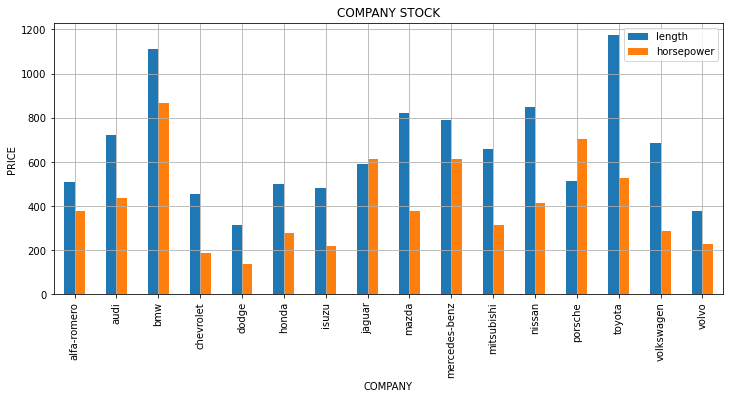

In [53]:
pd.pivot_table(data = df, index='company',values='horsepower',aggfunc='mean',margins=True)

# pd.pivot_table(data = df, index='company',values=['length',
#                                                   'horsepower']).plot(kind='bar',figsize=(12,5))

df[['length','horsepower','company']].groupby('company').sum().plot(kind='bar',
                                                                    figsize=(12,5),
                                                                   grid=True,
                                                                   title='COMPANY STOCK',
                                                                   xlabel = 'COMPANY',
                                                                   ylabel ='PRICE')

In [58]:
df['length'].mean()

173.0983606557378

In [62]:
df.loc[df['length'] > df['length'].mean()].shape

(24, 10)

# Sort_values

In [77]:
df.drop(columns = 'index').loc[35]
# pd.set_option(display.max_row,None)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


<AxesSubplot:xlabel='company'>

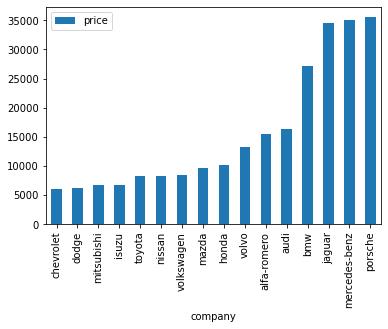

In [90]:
df['price'].max()

df.loc[df['price'].idxmax()]

df.sort_values(by='price') #ascending
df.sort_values(by='price',ascending=False)  #descending
df.sort_values(by='price',ascending=False,ignore_index=True)  #descending

df.nlargest(3,'horsepower')
df.nsmallest(3,'horsepower')

df[['company','price']].groupby('company').mean().sort_values(by='price').plot(kind='bar')

In [96]:
pd.pivot_table(data = df, index='body-style',values='length',
               aggfunc='count',margins=True,margins_name='Grand Total')

,length
body-style,
convertible,3
hardtop,2
hatchback,15
sedan,32
wagon,9
Grand Total,61


# Concatenating Data

In [99]:
db1 = pd.read_excel('movies.xls')
db2 = pd.read_excel('movies.xls',sheet_name='2000s')
db3 = pd.read_excel('movies.xls',sheet_name='2010s')

In [100]:
print(db1.shape)
print(db2.shape)
print(db3.shape)

(1338, 25)
(2100, 25)
(1604, 25)


In [106]:
pd.concat([db1,db2,db3],axis=0).shape

(5042, 25)

In [107]:
pd.concat([db1,db2,db3],axis=1).shape

(2100, 75)

In [108]:
pd.ExcelFile('movies.xls').sheet_names

['1900s', '2000s', '2010s']

In [ ]:
pd.merge()